## 5.3 画像データの処理

### 5.3.1 画像を扱う準備

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


sample = Image.open("data/tiger.png")

In [2]:
type(sample)

PIL.PngImagePlugin.PngImageFile

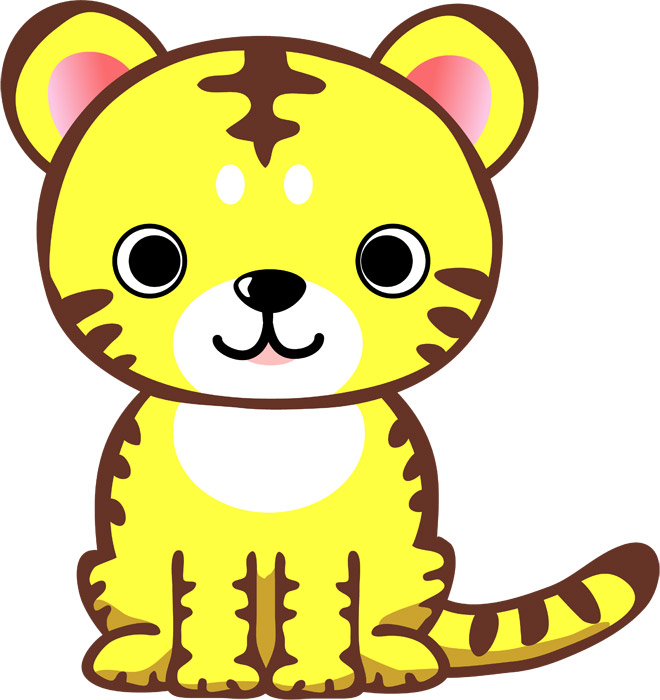

In [3]:
sample

### 5.3.2 画像データの基本

In [4]:
sample.size

(660, 700)

In [5]:
print(sample.format)
print(sample.mode)

PNG
RGBA


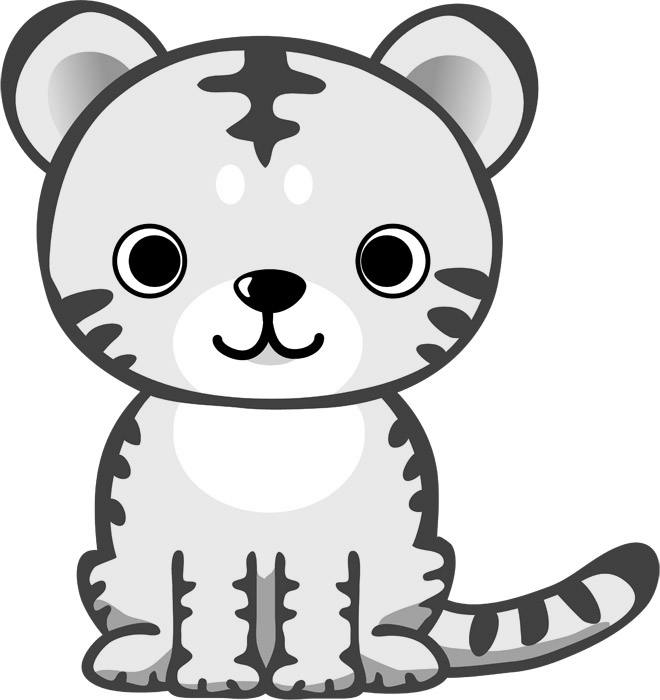

In [6]:
sample.convert('L')

In [7]:
sample.show()

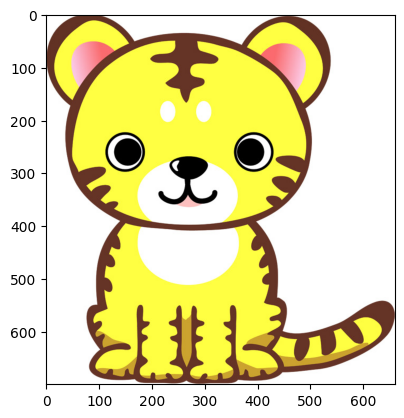

In [8]:
fig, ax = plt.subplots()
# imshowメソッドを使って画像を表示する
ax.imshow(sample)
plt.show()

### 5.3.3 簡単な画像の処理

#### サイズの変更

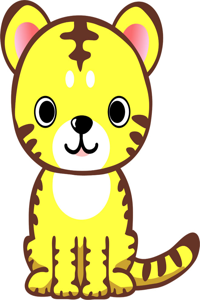

In [9]:
sample.resize(size=(200, 300))

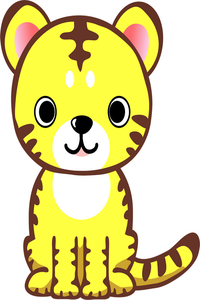

In [10]:
sample.resize(size=(200, 300), resample=Image.Resampling.LANCZOS)

#### 画像の回転

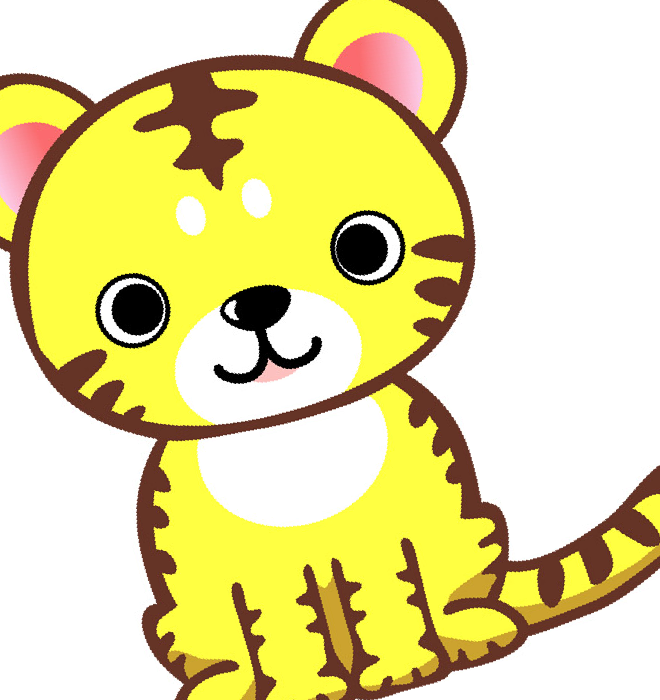

In [11]:
sample.rotate(15)

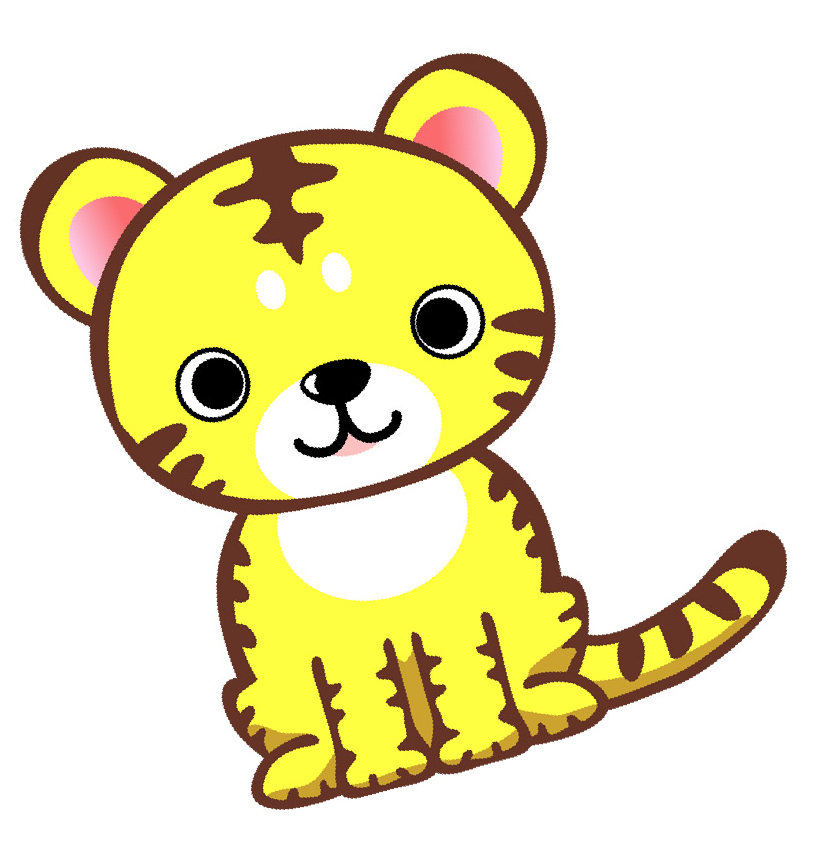

In [12]:
sample.rotate(15, expand=True)

#### 画像の切り出し

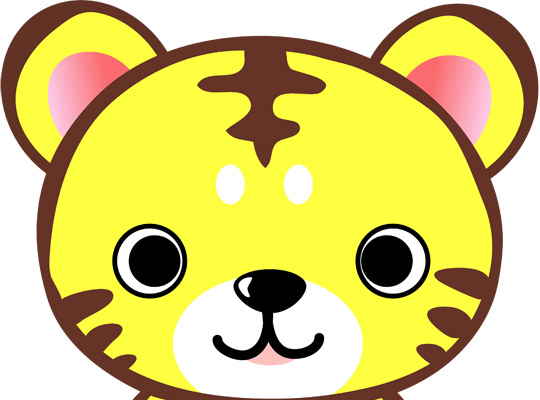

In [13]:
sample.crop((0, 0, 540, 400))

#### 画像の保存

In [14]:
crop_img = sample.crop((0, 0, 540, 400))
crop_img.save('crop_img.png')

### 5.3.4 数値データとしての画像

In [15]:
num_img = np.array(sample)

In [16]:
num_img.shape

(700, 660, 4)

In [17]:
num_img[0, 0]

array([255, 255, 255, 255], dtype=uint8)

In [18]:
num_img[100, 100]

array([ 99,  50,  36, 255], dtype=uint8)

### 5.3.5 機械学習を使った画像の分類

#### ファイルの読み込み

In [19]:
p = Path('data/shapes')
circles = list(p.glob('circle/*.png'))
circles[:10]

[PosixPath('data/shapes/circle/348.png'),
 PosixPath('data/shapes/circle/1804.png'),
 PosixPath('data/shapes/circle/1810.png'),
 PosixPath('data/shapes/circle/1186.png'),
 PosixPath('data/shapes/circle/412.png'),
 PosixPath('data/shapes/circle/374.png'),
 PosixPath('data/shapes/circle/1838.png'),
 PosixPath('data/shapes/circle/360.png'),
 PosixPath('data/shapes/circle/406.png'),
 PosixPath('data/shapes/circle/1192.png')]

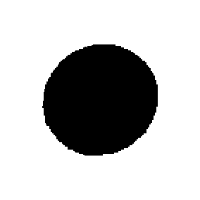

In [20]:
sample = Image.open(circles[0])
sample

In [21]:
sample.size

(200, 200)

In [22]:
np.array(sample)[0, 0]

255

#### データの準備

In [23]:
cls_dic = {'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}

In [24]:
X = []
y = []

for name, cls in cls_dic.items():
    child = p / name
    for img in child.glob('*.png'):
        X.append(np.array(Image.open(img)).flatten())
        y.append(cls)

In [25]:
len(X)

14970

In [26]:
len(X[0])

40000

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=123)

#### モデルの作成と評価

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=123)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [29]:
pred = rf_clf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3534
           1       0.99      1.00      1.00      3578
           2       1.00      1.00      1.00      3580
           3       1.00      1.00      1.00      3530

    accuracy                           1.00     14222
   macro avg       1.00      1.00      1.00     14222
weighted avg       1.00      1.00      1.00     14222

